In [1]:
import pandas as pd

df = pd.read_csv('dataset.csv')

df.head()


,occupation,age,education_level,marital_status,communication_channel,call_month,call_day,call_duration,call_frequency,previous_campaign_outcome,conversion_status
0,administrative_staff,28,high_school,married,unidentified,September,9,1,1,successful,not_converted
1,administrative_staff,58,unidentified,married,unidentified,June,5,307,2,unidentified,not_converted
2,jobless,40,high_school,divorced,mobile,February,4,113,1,unidentified,not_converted
3,retired_worker,63,high_school,married,mobile,April,7,72,5,unidentified,not_converted
4,business_owner,43,college,married,landline,July,29,184,4,unidentified,not_converted


## Occupation Analysis

C:\Users\Omar\AppData\Local\Temp\ipykernel_27448\2361128436.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  conversion_rates = occupation_conversion.groupby('occupation').apply(


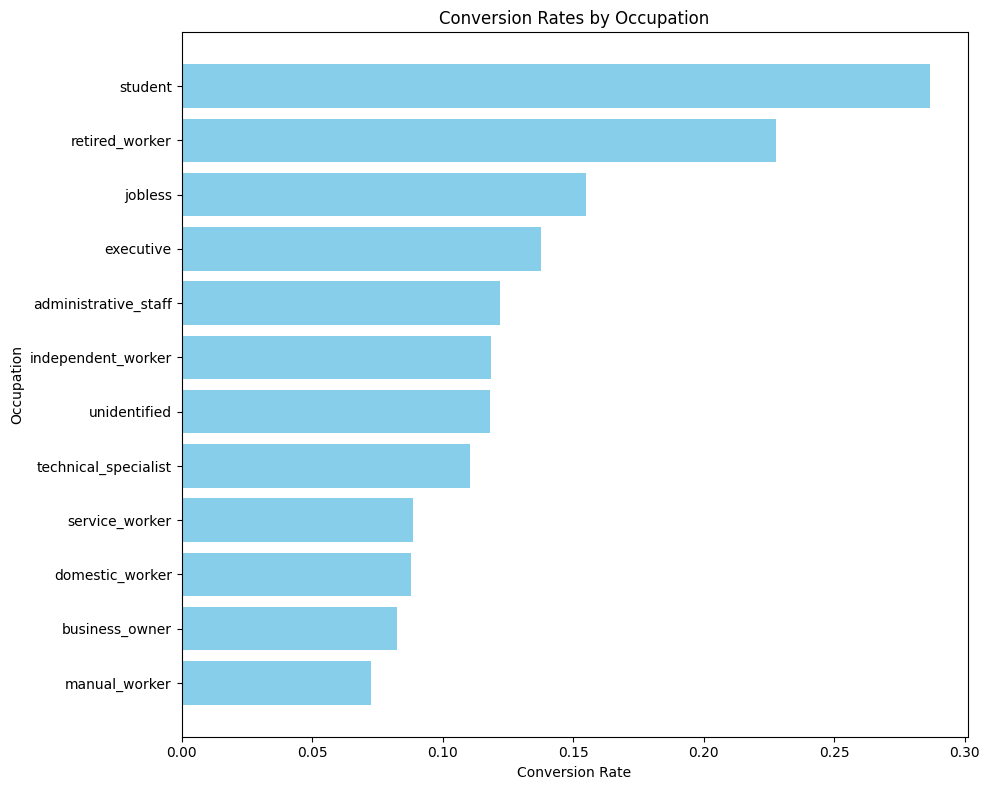

In [5]:
conversion_rates = occupation_conversion.groupby('occupation').apply(
    lambda x: (x['conversion_status'] == 'converted').mean()
).reset_index(name='conversion_rate')


import matplotlib.pyplot as plt
conversion_rates_sorted_for_plot = conversion_rates_sorted.sort_values(by='conversion_rate')
# Plotting
plt.figure(figsize=(10, 8))
plt.barh(conversion_rates_sorted_for_plot['occupation'], conversion_rates_sorted_for_plot['conversion_rate'], color='skyblue')
plt.xlabel('Conversion Rate')
plt.ylabel('Occupation')
plt.title('Conversion Rates by Occupation')
plt.tight_layout()

plt.show()


Students have the highest conversion rate at approximately 28.7%, making them the most responsive group in the dataset.

Retired Workers follow with a conversion rate of about 22.8%, indicating that this demographic is also quite receptive.

Jobless individuals have a conversion rate of around 15.5%, placing them third in terms of responsiveness.
Other notable occupations include Executives and Administrative Staff, with conversion rates of approximately 13.8% and 12.2%, respectively.

Manual Workers have the lowest conversion rate at about 7.3%.

## Education Level Impact

C:\Users\Omar\AppData\Local\Temp\ipykernel_27448\3496243907.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  education_conversion_rates = education_conversion.groupby('education_level').apply(


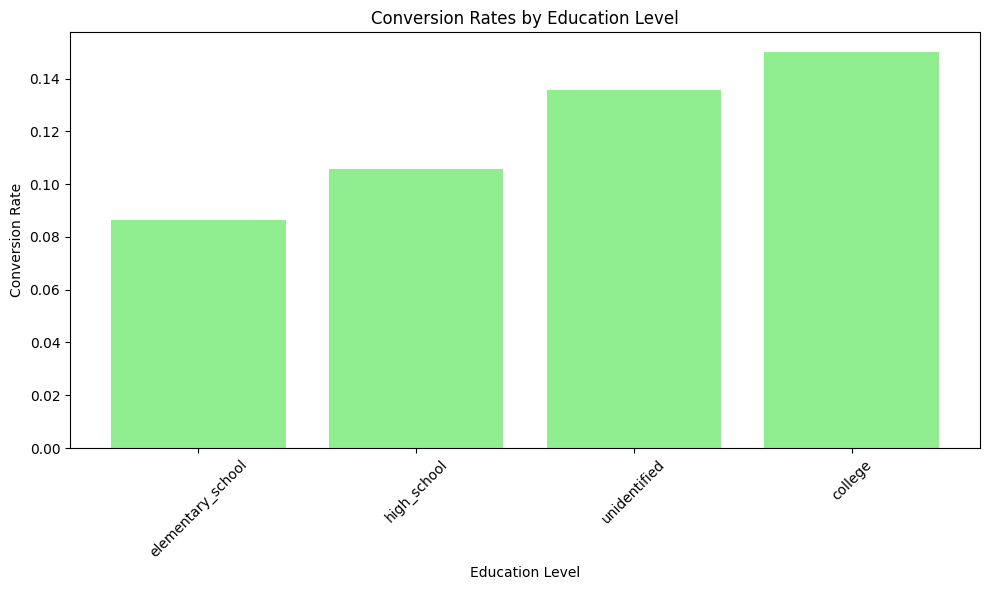

In [7]:
education_conversion = df[['education_level', 'conversion_status']]

education_conversion_rates = education_conversion.groupby('education_level').apply(
    lambda x: (x['conversion_status'] == 'converted').mean()
).reset_index(name='conversion_rate')

education_conversion_rates_sorted_for_plot = education_conversion_rates_sorted.sort_values(by='conversion_rate')

plt.figure(figsize=(10, 6))
plt.bar(education_conversion_rates_sorted_for_plot['education_level'], education_conversion_rates_sorted_for_plot['conversion_rate'], color='lightgreen')
plt.xlabel('Education Level')
plt.ylabel('Conversion Rate')
plt.title('Conversion Rates by Education Level')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()



## Marital Status Influence

C:\Users\Omar\AppData\Local\Temp\ipykernel_27448\3967567457.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  marital_conversion_rates = marital_conversion.groupby('marital_status').apply(


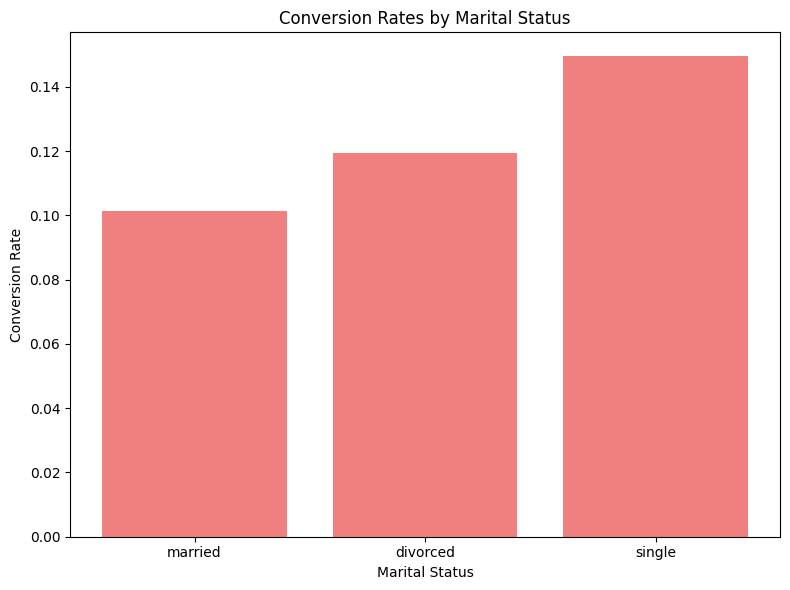

In [13]:
marital_conversion = df[['marital_status', 'conversion_status']]

marital_conversion_rates = marital_conversion.groupby('marital_status').apply(
    lambda x: (x['conversion_status'] == 'converted').mean()
).reset_index(name='conversion_rate')

marital_conversion_rates_sorted = marital_conversion_rates.sort_values(by='conversion_rate', ascending=False)
marital_conversion_rates_sorted_for_plot = marital_conversion_rates_sorted.sort_values(by='conversion_rate')
plt.figure(figsize=(8, 6))
plt.bar(marital_conversion_rates_sorted_for_plot['marital_status'], marital_conversion_rates_sorted_for_plot['conversion_rate'], color='lightcoral')
plt.xlabel('Marital Status')
plt.ylabel('Conversion Rate')
plt.title('Conversion Rates by Marital Status')
plt.tight_layout()

# Show plot
plt.show()


## Conversion Rates by Channel

C:\Users\Omar\AppData\Local\Temp\ipykernel_27448\798823778.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  channel_conversion_rates = channel_conversion.groupby('communication_channel').apply(


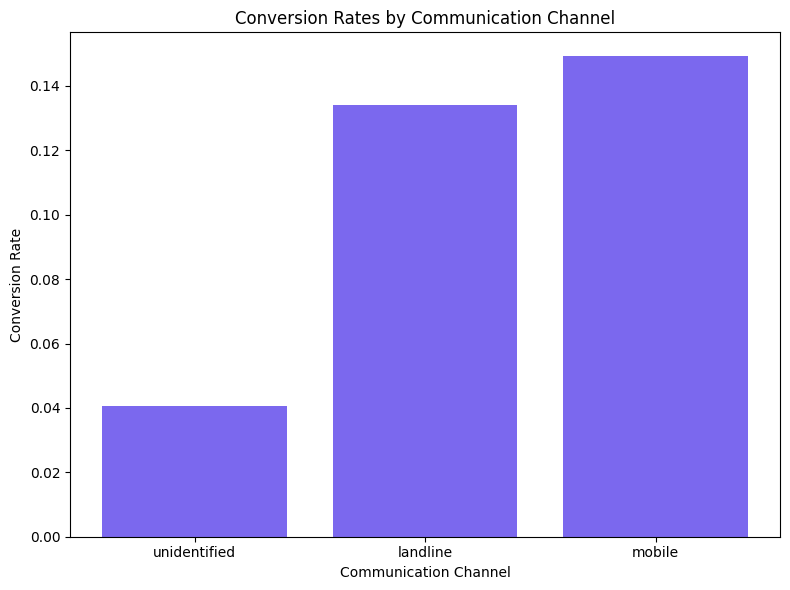

In [15]:
channel_conversion = df[['communication_channel', 'conversion_status']]

channel_conversion_rates = channel_conversion.groupby('communication_channel').apply(
    lambda x: (x['conversion_status'] == 'converted').mean()
).reset_index(name='conversion_rate')

channel_conversion_rates_sorted = channel_conversion_rates.sort_values(by='conversion_rate', ascending=False)

channel_conversion_rates_sorted_for_plot = channel_conversion_rates_sorted.sort_values(by='conversion_rate')

plt.figure(figsize=(8, 6))
plt.bar(channel_conversion_rates_sorted_for_plot['communication_channel'], channel_conversion_rates_sorted_for_plot['conversion_rate'], color='mediumslateblue')
plt.xlabel('Communication Channel')
plt.ylabel('Conversion Rate')
plt.title('Conversion Rates by Communication Channel')
plt.tight_layout()

plt.show()


## Monthly Trends

In [17]:
month_grouped = df.groupby('call_month')

monthly_conversion_rates = month_grouped.apply(lambda x: (x['conversion_status'] == 'converted').mean()).reset_index(name='conversion_rate')
monthly_call_counts = month_grouped.size().reset_index(name='call_count')

monthly_trends = pd.merge(monthly_conversion_rates, monthly_call_counts, on='call_month')

months_order = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
monthly_trends['call_month'] = pd.Categorical(monthly_trends['call_month'], categories=months_order, ordered=True)
monthly_trends_sorted = monthly_trends.sort_values('call_month')

C:\Users\Omar\AppData\Local\Temp\ipykernel_27448\1412691160.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  monthly_conversion_rates = month_grouped.apply(lambda x: (x['conversion_status'] == 'converted').mean()).reset_index(name='conversion_rate')


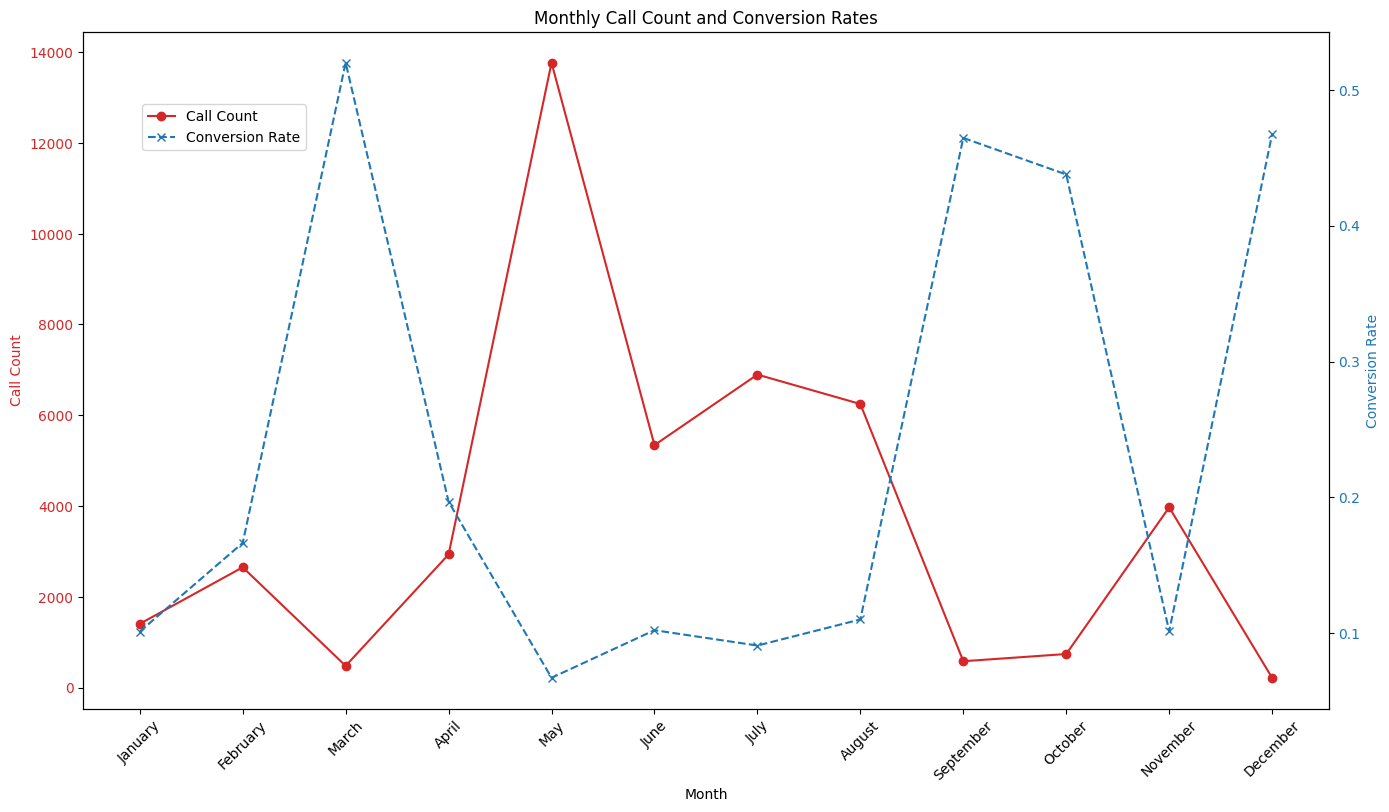

In [18]:

fig, ax1 = plt.subplots(figsize=(14, 8))

color = 'tab:red'
ax1.set_xlabel('Month')
ax1.set_ylabel('Call Count', color=color)
ax1.plot(monthly_trends_sorted['call_month'], monthly_trends_sorted['call_count'], color=color, marker='o', label='Call Count')
ax1.tick_params(axis='y', labelcolor=color)
ax1.tick_params(axis='x', rotation=45)

ax2 = ax1.twinx()  

color = 'tab:blue'
ax2.set_ylabel('Conversion Rate', color=color)  
ax2.plot(monthly_trends_sorted['call_month'], monthly_trends_sorted['conversion_rate'], color=color, marker='x', linestyle='--', label='Conversion Rate')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout() 
plt.title('Monthly Call Count and Conversion Rates')
fig.legend(loc="upper left", bbox_to_anchor=(0.1,0.9))

plt.show()


Conversion Rate Peaks: The conversion rates peak notably in March, September, October, and December. Specifically, March (51.99%), September (46.46%), October (43.77%), and December (46.73%) exhibit significantly higher conversion rates compared to other months. These peaks suggest seasonal trends or specific campaign efforts that were particularly effective during these periods.

Call Activity: The number of calls made varies significantly across different months, with May seeing the highest number of calls (13,766) and December the lowest (214). Despite the lower call volume in months like March, September, October, and December, the conversion rates in these months are among the highest, indicating that the success of calls in terms of conversion does not strictly correlate with the volume of calls made.

Seasonal Trends: There appears to be a seasonal trend in both call activity and conversion rates, with certain months showing heightened effectiveness in conversion despite lower call volumes. This could reflect the impact of external factors such as holidays or financial year-end considerations on customer responsiveness.

## Day of the Month Effect

In [19]:
day_grouped = df.groupby('call_day')

daily_conversion_rates = day_grouped.apply(lambda x: (x['conversion_status'] == 'converted').mean()).reset_index(name='conversion_rate')
daily_conversion_rates_sorted = daily_conversion_rates.sort_values('call_day')

C:\Users\Omar\AppData\Local\Temp\ipykernel_27448\2461319744.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  daily_conversion_rates = day_grouped.apply(lambda x: (x['conversion_status'] == 'converted').mean()).reset_index(name='conversion_rate')


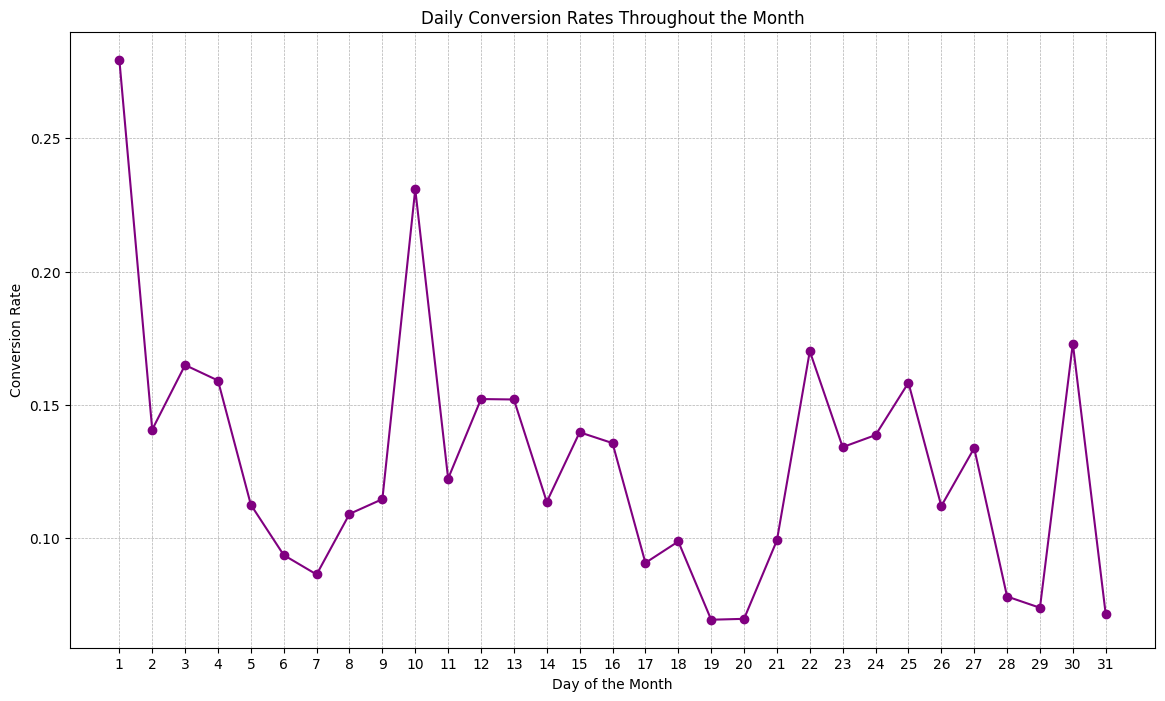

In [20]:
plt.figure(figsize=(14, 8))
plt.plot(daily_conversion_rates_sorted['call_day'], daily_conversion_rates_sorted['conversion_rate'], marker='o', linestyle='-', color='purple')
plt.xlabel('Day of the Month')
plt.ylabel('Conversion Rate')
plt.title('Daily Conversion Rates Throughout the Month')
plt.xticks(range(1, 32))  
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.show()


The daily conversion rates throughout the month, highlighting the variability in conversion success on different days. Notably, the first day of the month shows a significant peak in conversion rate, suggesting a potential strategic advantage in initiating contact at the beginning of the month. Additionally, there are fluctuations throughout the month, with some days showing higher conversion rates than others, such as a noticeable increase around the 30th day.

This variability underscores the importance of considering the timing of outreach efforts within the marketing strategy. By aligning call activities with days showing historically higher conversion rates, it may be possible to optimize the effectiveness of future campaigns

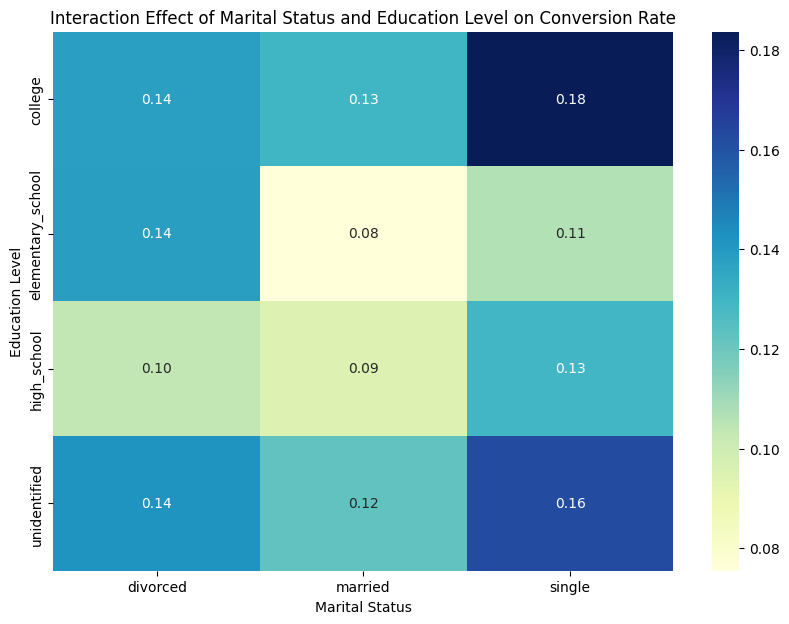

In [22]:

import seaborn as sns
df['converted_int'] = df['conversion_status'].apply(lambda x: 1 if x == 'converted' else 0)
pivot_table_interaction = df.pivot_table(values='converted_int', index='education_level', columns='marital_status', aggfunc='mean')

plt.figure(figsize=(10, 7))
sns.heatmap(pivot_table_interaction, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('Interaction Effect of Marital Status and Education Level on Conversion Rate')
plt.ylabel('Education Level')
plt.xlabel('Marital Status')
plt.show()


Individuals who are single and have a college education appear to have the highest conversion rate at 0.18.
Married individuals with high school education have the lowest conversion rate at 0.09.